In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def KS_Wert(f_x, f_0):
    diff = np.abs(f_x - f_0)
    d_max = np.max(diff)
    n = N
    m = N
    testwert = np.sqrt((n*m)/(n+m)) * d_max
    return testwert


def KS_Alpha(alpha):
    K_alpha = np.sqrt(np.log(2/alpha) / 2)
    return K_alpha


def KS_Test(f_x, f_0, alpha):
    testwert = KS_Wert(f_x, f_0)
    KS_alpha = KS_Alpha(alpha)
    return testwert < KS_Alpha

In [13]:
N = 10000
bins = 100


def test(lam):
    # np.random.seed(124)
    
    mu = lam
    sigma = np.sqrt(lam)
    untergrenze = mu - 5*sigma
    obergrenze = mu + 5*sigma

    f_x = np.random.poisson(lam, N)
    hist_x = np.histogram(f_x, bins, (untergrenze, obergrenze))
    cum_x = np.cumsum(hist_x[0])
    cum_x = cum_x / cum_x[-1]  # normieren

    f_0 = np.floor(np.random.normal(mu, sigma, N) + 0.5)
    hist_0 = np.histogram(f_0, bins, (untergrenze, obergrenze))
    cum_0 = np.cumsum(hist_0[0])
    cum_0 = cum_0 / cum_0[-1]  # normieren
    
    return KS_Wert(cum_x, cum_0)
    # print("lam:", lam, "alpha:", alpha, "angenommen:", KS_Test(cum_x, cum_0, alpha))

    
# test(0.05)

In [15]:
size = 100
lambdas = np.linspace(0, 20, size)

ks_050 = np.zeros(size)
for i, lam in enumerate(lambdas):
    for j in range(5):
        ks_050[i] += test(lam)
ks_050 /= 5

#plt.plot(lambdas, ks_050)
#plt.plot(lambdas, np.full_like(lambdas, KS_Alpha(0.05)))

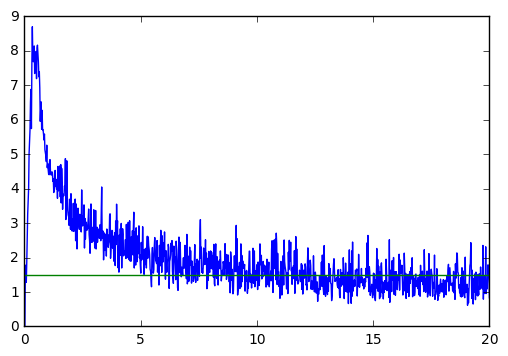

In [40]:
ks_025 = np.zeros(size)
for i, lam in enumerate(lambdas):
    ks_025[i] = test(lam)

plt.plot(lambdas, ks_025)
plt.plot(lambdas, np.full_like(lambdas, KS_Alpha(0.025)))

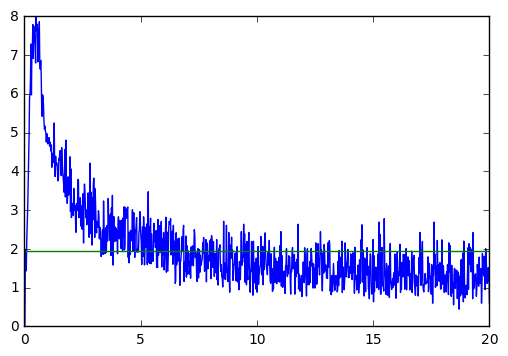

In [41]:
ks_001 = np.zeros(size)
for i, lam in enumerate(lambdas):
    ks_001[i] = test(lam)

plt.plot(lambdas, ks_001)
plt.plot(lambdas, np.full_like(lambdas, KS_Alpha(0.001)))